## || - Analyse des Données

### 1) Import des BIblio et Dataframe

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as ss
import scipy.stats as stats
from dython.nominal import associations

In [6]:
df = pd.read_csv("../data/gold.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,nb-service
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [7]:
categorial_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService',
        'Contract', 'PaperlessBilling', 'PaymentMethod']

In [8]:
df[categorial_features].describe()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,2,4
top,Male,No,No,No,No,Fiber optic,Month-to-month,Yes,Electronic check
freq,3555,5901,3641,4933,3390,3096,3875,4171,2365


### 2) Analyses univariées :

In [9]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,nb-service
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.037910
std,24.559481,30.090047,2266.794470,1.847682
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000
50%,29.000000,70.350000,1394.550000,2.000000
75%,55.000000,89.850000,3786.600000,3.000000
max,72.000000,118.750000,8684.800000,6.000000


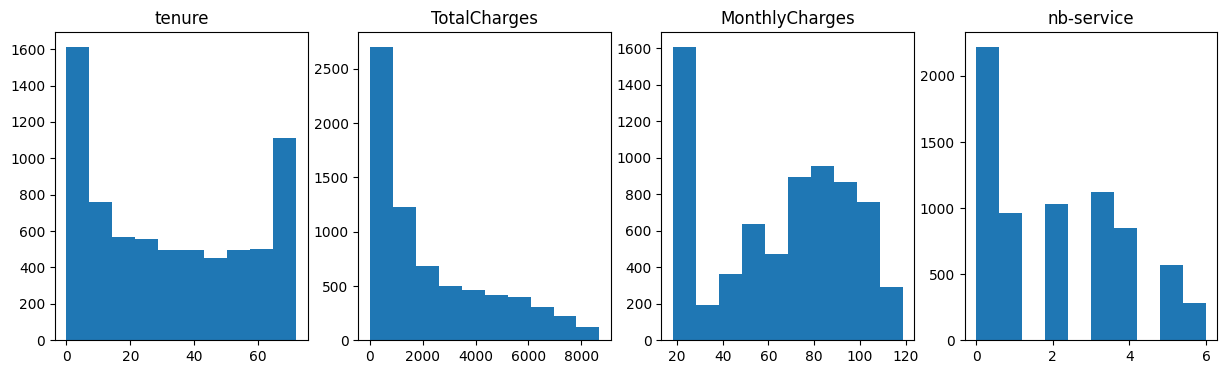

In [10]:
import matplotlib.pyplot as plt

# Créer une figure et des axes pour les histogrammes
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

# Tracer l'histogramme pour la tenure
axs[0].hist(df['tenure'], bins=10)
axs[0].set_title('tenure')

# Tracer l'histogramme pour TotalCharges
axs[1].hist(df['TotalCharges'], bins=10)
axs[1].set_title('TotalCharges')

# Tracer l'histogramme pour MonthlyCharges
axs[2].hist(df['MonthlyCharges'], bins=10)
axs[2].set_title('MonthlyCharges')

# Tracer l'histogramme pour nbservices
axs[3].hist(df['nb-service'], bins=10)
axs[3].set_title('nb-service')

# Afficher les histogrammes
plt.show()

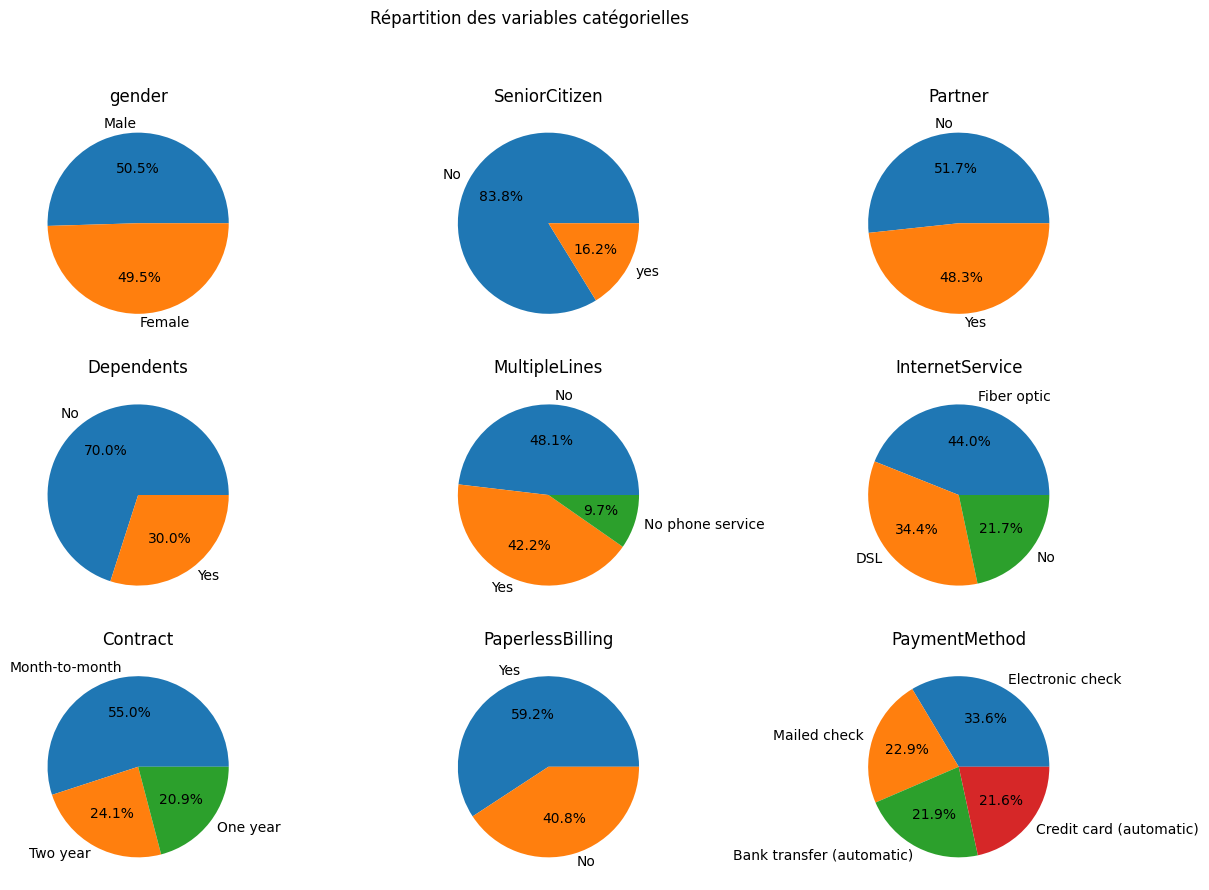

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('Répartition des variables catégorielles')

for i, feature in enumerate(categorial_features):
    row = i // 3
    col = i % 3
    counts = df[feature].value_counts()
    axs[row, col].pie(counts, labels=counts.index, autopct='%1.1f%%')
    axs[row, col].set_title(feature)

plt.show()

### 3) Analyse bi-variées 

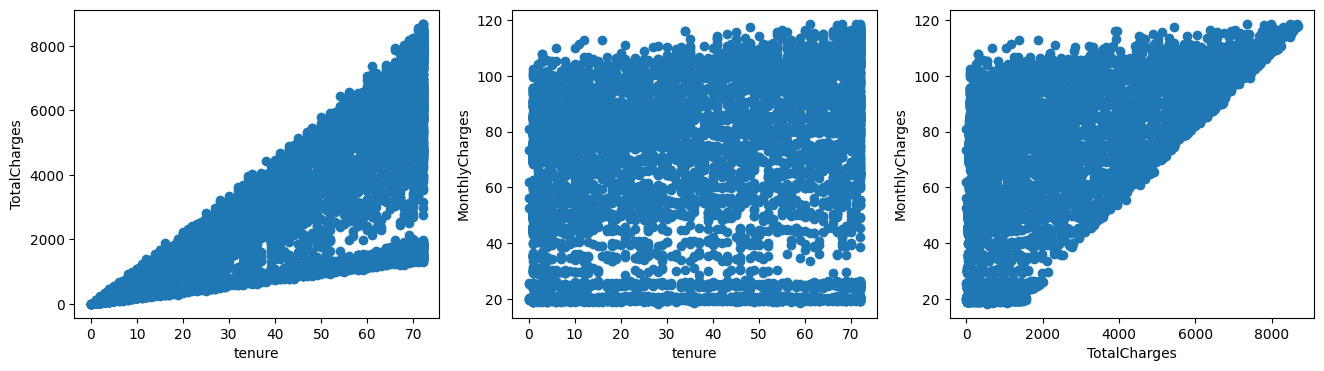

In [12]:
# Tracer les scatter plots
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].scatter(df['tenure'], df['TotalCharges'])
axs[0].set_xlabel('tenure')
axs[0].set_ylabel('TotalCharges')
axs[1].scatter(df['tenure'], df['MonthlyCharges'])
axs[1].set_xlabel('tenure')
axs[1].set_ylabel('MonthlyCharges')
axs[2].scatter(df['TotalCharges'], df['MonthlyCharges'])
axs[2].set_xlabel('TotalCharges')
axs[2].set_ylabel('MonthlyCharges')

# Afficher les graphiques
plt.show()

In [13]:
categorial_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService',
        'Contract', 'PaperlessBilling', 'PaymentMethod']

### 2) Corrélations entre les variables 

##### <font color="yellow">! Test Pearson => H0 : l’hypothèse nulle est : « les deux variables testées sont indépendantes » ( si p-value < 5% on rejette H0)</font>

In [14]:
# Calculer la matrice de corrélation
corr_matrix = df[['tenure', 'TotalCharges', 'MonthlyCharges']].corr(method='pearson')

# Afficher la matrice de corrélation
print(corr_matrix)

                  tenure  TotalCharges  MonthlyCharges
tenure          1.000000      0.826178        0.247900
TotalCharges    0.826178      1.000000        0.651174
MonthlyCharges  0.247900      0.651174        1.000000


##### <font color="yellow">! Test khi-deux => H0 : l’hypothèse nulle est : « les deux variables testées sont indépendantes » ( si p-value < 5% on rejette H0)</font>

In [15]:
# Effectuer le test du chi-deux pour les variables catégorielles (gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod et Churn)
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',  
                         'Contract', 'PaperlessBilling', 'PaymentMethod']

for var in categorical_variables:
    contingency_table = pd.crosstab(df[var], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("P-value du Test du chi-deux pour la variable", var, ":", p)

P-value du Test du chi-deux pour la variable gender : 0.48657873605618596
P-value du Test du chi-deux pour la variable SeniorCitizen : 1.510066805092378e-36
P-value du Test du chi-deux pour la variable Partner : 2.1399113440759935e-36
P-value du Test du chi-deux pour la variable Dependents : 4.9249216612154196e-43
P-value du Test du chi-deux pour la variable PhoneService : 0.3387825358066928
P-value du Test du chi-deux pour la variable MultipleLines : 0.0034643829548773
P-value du Test du chi-deux pour la variable InternetService : 9.571788222840544e-160
P-value du Test du chi-deux pour la variable Contract : 5.863038300673391e-258
P-value du Test du chi-deux pour la variable PaperlessBilling : 4.073354668665985e-58
P-value du Test du chi-deux pour la variable PaymentMethod : 3.6823546520097993e-140


In [16]:
def cramers_v(var1, var2):
    confusion_matrix = pd.crosstab(var1, var2)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [17]:
cramers_v(df['Churn'], df['InternetService'])

0.3220367323307425

In [18]:
cramers_v(df['Churn'], df['Contract'])

0.40979839182553446

##### <font color="yellow">! Test Fisher => H0 : l’hypothèse nulle est : « les deux variables testées sont indépendantes » ( si p-value < 5% on rejette H0)</font>

In [19]:
# Effectuer une ANOVA pour la variable catégorique Churn et la variable continue MonthlyCharges
model = ols('MonthlyCharges ~ Churn', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Effectuer une ANOVA pour la variable catégorique Churn et la variable continue TotalCharges
model = ols('TotalCharges ~ Churn', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Effectuer une ANOVA pour la variable catégorique Churn et la variable continue tenure
model = ols('tenure ~ Churn', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F        PR(>F)
Churn     2.383740e+05     1.0  273.463704  2.706646e-60
Residual  6.137530e+06  7041.0         NaN           NaN
                sum_sq      df           F        PR(>F)
Churn     1.423220e+09     1.0  288.278961  2.127212e-63
Residual  3.476109e+10  7041.0         NaN           NaN
                sum_sq      df          F         PR(>F)
Churn     5.269675e+05     1.0  997.26801  7.999058e-205
Residual  3.720542e+06  7041.0        NaN            NaN


- Le coefficient de corrélation de rang de Spearman mesure la corrélation entre deux variables ordinales ou continues.  
Il est également compris entre -1 et 1, où une valeur de -1 indique une corrélation négative parfaite,  
une valeur de 0 indique l'absence de corrélation et une valeur de 1 indique une corrélation positive parfaite  

In [20]:
# Calcul du coefficient de corrélation de rang de Spearman entre Churn et MonthlyCharges
corr, p_value = stats.spearmanr(df['Churn'], df['MonthlyCharges'])
print('Coefficient de corrélation de rang de Spearman :', corr)
print('p-value :', p_value)

# Calcul du coefficient de corrélation de rang de Spearman entre Churn et TotalCharges
corr, p_value = stats.spearmanr(df['Churn'], df['TotalCharges'])
print('Coefficient de corrélation de rang de Spearman :', corr)
print('p-value :', p_value)

# Calcul du coefficient de corrélation de rang de Spearman entre Churn et tenure
corr, p_value = stats.spearmanr(df['Churn'], df['tenure'])
print('Coefficient de corrélation de rang de Spearman :', corr)
print('p-value :', p_value)

Coefficient de corrélation de rang de Spearman : 0.18474274666624488
p-value : 4.132385749669143e-55
Coefficient de corrélation de rang de Spearman : -0.22995525897249963
p-value : 3.5491974974790915e-85
Coefficient de corrélation de rang de Spearman : -0.3670618566861082
p-value : 1.404616769950862e-223


/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


##### <font color="yellow"> Conclusion Tests : </font>

- ON constate que les variables (MonthlyCharges, TotalCharges, tenure, SeniorCitizen,Partner,Dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup , DeviceProtection , TechSupport , StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod ) ont une influence sur notre Target variable Churn

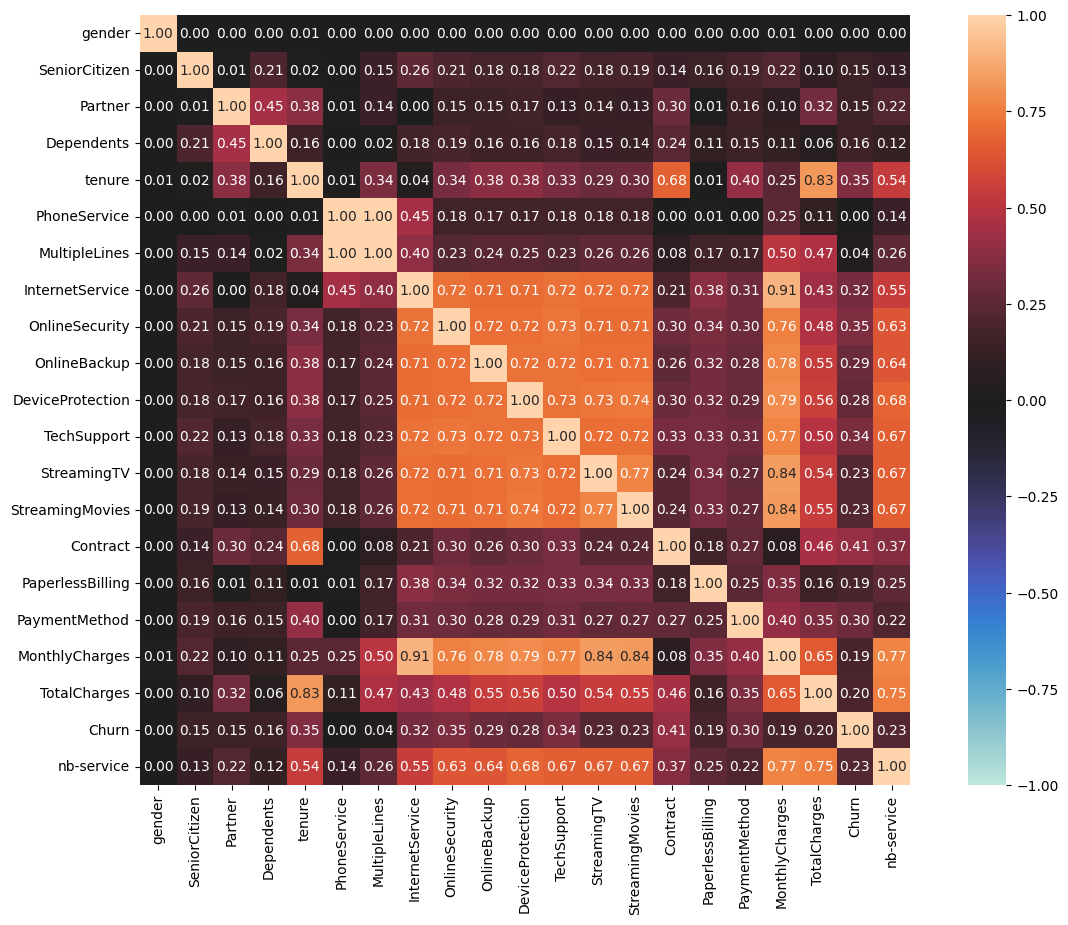

{'corr':                     gender  SeniorCitizen   Partner  Dependents    tenure  \
 gender            1.000000       0.000000  0.000000    0.000000  0.005106   
 SeniorCitizen     0.000000       1.000000  0.010817    0.210442  0.016567   
 Partner           0.000000       0.010817  1.000000    0.452241  0.379697   
 Dependents        0.000000       0.210442  0.452241    1.000000  0.159712   
 tenure            0.005106       0.016567  0.379697    0.159712  1.000000   
 PhoneService      0.000000       0.000000  0.012439    0.000000  0.008448   
 MultipleLines     0.000000       0.145682  0.142918    0.018594  0.343382   
 InternetService   0.000000       0.264807  0.000000    0.179491  0.039100   
 OnlineSecurity    0.002416       0.210411  0.151083    0.193862  0.335528   
 OnlineBackup      0.000000       0.182008  0.152419    0.161897  0.375681   
 DeviceProtection  0.000000       0.182307  0.165725    0.156677  0.375982   
 TechSupport       0.000000       0.223432  0.126533    

In [21]:
associations(df,nominal_columns=['chrune', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], numerical_columns=['MonthlyCharges', 'tenure' ,'TotalCharges'], 
             mark_columns=False,nom_nom_assoc='cramer',num_num_assoc='pearson', nom_num_assoc='correlation_ratio', symmetric_nom_nom=True, symmetric_num_num=True, 
             display_rows='all', display_columns='all', hide_rows=None, hide_columns=None, cramers_v_bias_correction=True, 
             nan_strategy='replace', nan_replace_value=0.0, ax=None,  annot=True, fmt='.2f',cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, 
             compute_only=False, clustering=False, title=None,filename=None, multiprocessing=False, max_cpu_cores=None, figsize=(15, 10))

In [22]:
#scatter num num    Box plot conti et categor heatmap de répartation entre deux variables caté